# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for the top 6 data jobs in US
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title in US

Filter our data to only include salary values from the United States.

In [2]:
# filter for the job titles and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

## Plot Salary Distributions in US

Plot the top 6 job titles salary distributions using a box plot.

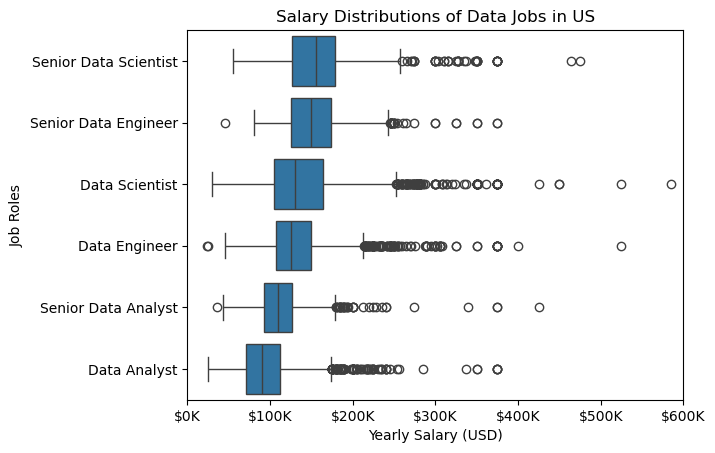

In [4]:
sns.boxplot(data= df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
plt.title('Salary Distributions of Data Jobs in US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Job Roles')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts in US

In [5]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills in US

In [6]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [7]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


Create two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

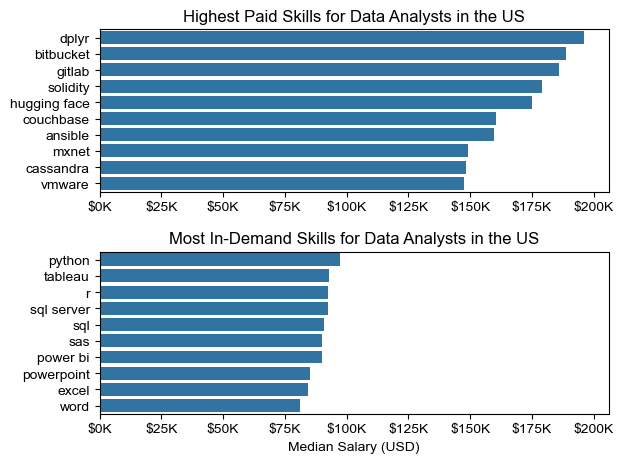

In [8]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0])

 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1])

ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts in India

In [9]:
# Only get data analyst jobs in India
df_DA_Ind = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_Ind = df_DA_Ind.dropna(subset=['salary_year_avg'])

df_DA_Ind = df_DA_Ind.explode('job_skills')

df_DA_Ind[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


## Determine The Highest Paid Skills and Most Demanded Skills In India

In [10]:
df_DA_top_pay_Ind = df_DA_Ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay_Ind = df_DA_top_pay_Ind.head(10)

df_DA_top_pay_Ind

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [11]:
df_DA_skills_Ind = df_DA_Ind.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills_Ind = df_DA_skills_Ind.head(10).sort_values(by='median', ascending=False)

df_DA_skills_Ind

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


Create two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

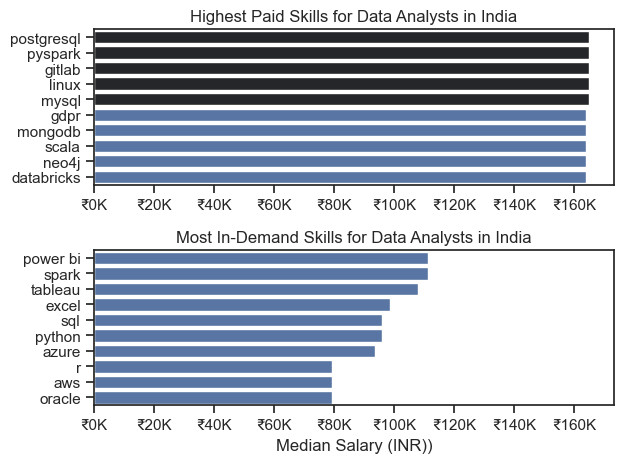

In [12]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay_Ind, x='median', y=df_DA_top_pay_Ind.index, ax=ax[0],  palette='dark:b_r', hue='median')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills_Ind, x='median', y=df_DA_skills_Ind.index, ax=ax[1])
ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR))')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

plt.tight_layout()
plt.show()